In [23]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from GimmePandas import ReadToPandas

In [267]:
#Using only the working files (filtering problem files out)
correct_files = []
for i in range (1,56):
    if i<10:
        a = "../Data/TenExSpectra_JSON/00"+str(i)+".json"
    elif i==18 or i==40 or i==43:
        continue
    else:
        a = "../Data/TenExSpectra_JSON/0"+str(i)+".json"
    correct_files.append(a)
print(correct_files)
print(len(correct_files))

['../Data/TenExSpectra_JSON/001.json', '../Data/TenExSpectra_JSON/002.json', '../Data/TenExSpectra_JSON/003.json', '../Data/TenExSpectra_JSON/004.json', '../Data/TenExSpectra_JSON/005.json', '../Data/TenExSpectra_JSON/006.json', '../Data/TenExSpectra_JSON/007.json', '../Data/TenExSpectra_JSON/008.json', '../Data/TenExSpectra_JSON/009.json', '../Data/TenExSpectra_JSON/010.json', '../Data/TenExSpectra_JSON/011.json', '../Data/TenExSpectra_JSON/012.json', '../Data/TenExSpectra_JSON/013.json', '../Data/TenExSpectra_JSON/014.json', '../Data/TenExSpectra_JSON/015.json', '../Data/TenExSpectra_JSON/016.json', '../Data/TenExSpectra_JSON/017.json', '../Data/TenExSpectra_JSON/019.json', '../Data/TenExSpectra_JSON/020.json', '../Data/TenExSpectra_JSON/021.json', '../Data/TenExSpectra_JSON/022.json', '../Data/TenExSpectra_JSON/023.json', '../Data/TenExSpectra_JSON/024.json', '../Data/TenExSpectra_JSON/025.json', '../Data/TenExSpectra_JSON/026.json', '../Data/TenExSpectra_JSON/027.json', '../Data/Te

In [268]:
data = ReadToPandas(correct_files)

origdata = data
df = data.sample(frac=1).reset_index(drop=True) #Randomize the order of data to avoid biases in train and test sets

Dataframe loaded


In [26]:
print(df.shape)

(523, 6)


In [269]:
x_sufl = df["Xdata"] #Extract only needed information from dictionary
y_sufl = df["Reflectivity"]
bl = df["Baseline"]

In [199]:
bl

0      99.9559
1      99.9301
2      98.1154
3      99.2432
4      100.033
        ...   
518     99.756
519    99.8476
520    99.5225
521    99.7141
522     99.745
Name: Baseline, Length: 523, dtype: object

In [270]:
x_sufl_arr = pd.DataFrame(x_sufl.to_list()) #Separate values into individual values data format
y_sufl_arr = pd.DataFrame(y_sufl.to_list())

In [271]:
x_sufl_train = x_sufl_arr.head(419) #Divide data into train and test set (was tried to use in the whole spectra prediction, but at the end then not used sucesfully)
x_sufl_test = x_sufl_arr.tail(104)
y_sufl_train = y_sufl_arr.head(419)
y_sufl_test = y_sufl_arr.tail(104)


In [272]:
#Tried normalizing the data to improve the whole spectra fittinig but at the end not used for working solutions
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(y_sufl_train)
print(scaler)
scaler.mean_
print("Means:")
print(scaler.mean_)
scaler.scale_
print("Scales:")
print(scaler.scale_)
y_scaled = scaler.transform(y_sufl_train)
print(y_scaled)
print(y_sufl_train)

StandardScaler()
Means:
[97.48176207 97.51589909 97.41253034 ... 98.92403732 98.93200022
 98.89390015]
Scales:
[3.27108351 3.25388042 3.28559307 ... 1.53583858 1.46615973 1.51600831]
[[-0.49537543 -0.69548202 -0.88150219 ... -0.23371689 -0.32500063
  -0.11510344]
 [-0.78313388 -0.58906027 -0.61371469 ...  0.14000055 -0.36144188
  -0.05762714]
 [ 0.28039621  0.93713287  0.62796068 ...  0.71469708  0.81227067
   1.58607133]
 ...
 [-0.10400902 -0.84966435 -1.12154235 ... -0.61101852 -1.28871841
  -0.71018881]
 [ 1.61538664  0.23858314  0.57138363 ... -0.14570025 -0.56128212
  -1.13208987]
 [-0.38098207 -0.44135946 -0.80280594 ... -0.49811816 -0.50243311
  -0.56664098]]
           0           1          2           3           4           5     \
0     95.861348   95.252884  94.516273   95.556546   96.537376   97.468930   
1     94.920066   95.599167  95.396114   95.244504   97.665370   95.236686   
2     98.398961  100.565217  99.475754   99.916283   99.752781   97.080292   
3    100.2318

In [273]:
# Instantiate a Gaussian Process model
kernel = C(10, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, alpha=0.3) #original 9

In [274]:
#Fitting the individual spectras (smoothening the curves) and going through 100 of them with for-loop
idx = 0
errors = []

In [276]:
for idx in range(0, 101):
    twod_x = np.atleast_2d(x_sufl_arr.to_numpy()[idx]).T
    gp.fit(twod_x, y_sufl_arr.to_numpy()[idx])
    y_pred, sigma = gp.predict(twod_x, return_std=True)
    error = np.abs(max(y_pred)-bl[idx])
    errors.append(error)
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [277]:
#MAE and median of errors:
import statistics
print(len(errors))
MAE = np.mean(errors)
print(MAE)
med = statistics.median(errors)
print(med)

101
0.5283358629382948
0.14426723139696662


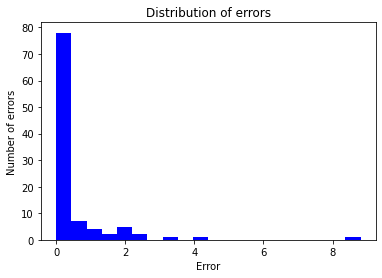

In [278]:
#Histogram about the distribution of errors:
plt.hist(errors, bins=20, density=False, facecolor='blue')
plt.xlabel("Error")
plt.ylabel("Number of errors")
plt.title("Distribution of errors")
plt.show()

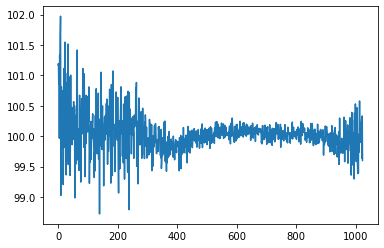

In [279]:
#Testing and plotting the individual spectra fitting results:
idx = 319
errors = []
twod_x = np.atleast_2d(x_sufl_arr.to_numpy()[idx]).T
#print(twod_x)
#print(y_scaled[idx])
plt.plot(y_sufl_arr.to_numpy()[idx])

In [280]:
gp.fit(twod_x, y_sufl_arr.to_numpy()[idx])
# gp.fit(twod_x, y_scaled[0])
gp.kernel_

31.6**2 * RBF(length_scale=1e+03)

In [281]:
x = np.atleast_2d(x_sufl_arr.to_numpy()[idx]).T
f_x = y_sufl_arr.to_numpy()[idx]
y = f_x

y_pred, sigma = gp.predict(x, return_std=True)
print(sigma)
print(x)
print(y_pred)
print(np.concatenate([y_pred - 1.9600 * sigma, (y_pred + 1.9600 * sigma)[::-1]]))
print(max(y_pred))
print(bl[idx])
error = np.abs(max(y_pred)-bl[idx])
errors.append(error)
print(errors)

[0.07886753 0.07804918 0.07723859 ... 0.07501969 0.07575456 0.07649621]
[[ 180.84664917]
 [ 181.79387422]
 [ 182.74106731]
 ...
 [1117.85378948]
 [1118.72873418]
 [1119.60356916]]
[100.39729567 100.39460197 100.39191577 ...  99.8520924   99.85028973
  99.84847821]
[100.24271531 100.24162559 100.24052813 ... 100.54330341 100.54757836
 100.55187604]
100.39729567471113
100.1021263956275
[0.29516927908363755]


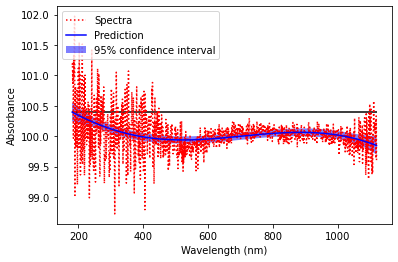

In [282]:
#Plot the spectra and predicted smothened curve, also the hline for the max-value ("predicted baseline"), which is very close to where it really should be
plt.plot(x, f_x, "r:", label=r"Spectra")

plt.plot(x, y_pred, "b-", label="Prediction")
plt.fill(
    np.concatenate([x, x[::-1]]),
    np.concatenate([y_pred - 1.9600 * sigma, (y_pred + 1.9600 * sigma)[::-1]]),
    alpha=0.5,
    fc="b",
    ec="None",
    label="95% confidence interval",
)
plt.hlines(max(y_pred), x[0], x[-1], 'k')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance")
plt.legend(loc="upper left")